Import the libraries

In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the csv file

In [64]:
# get the list of the csv files in hepsiemlak directory
files = os.listdir("hepsiemlak")
# read the csv files and combine them into a single dataframe
data = pd.concat([pd.read_csv("hepsiemlak/" + file) for file in files])
# reset the index of the dataframe
data.reset_index(drop=True, inplace=True)
# information about the data
print(data.info())
# describe the data
print(data.describe())
# Display the first 5 rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   img-link href        8136 non-null   object 
 1   photo-count          8130 non-null   float64
 2   list-view-price      8136 non-null   object 
 3   list-view-date       8136 non-null   object 
 4   celly                8136 non-null   object 
 5   celly 2              8136 non-null   object 
 6   celly 3              8136 non-null   object 
 7   celly 4              6858 non-null   object 
 8   list-view-header     8129 non-null   object 
 9   list-view-location   8136 non-null   object 
 10  he-lazy-image src    7649 non-null   object 
 11  left                 8114 non-null   object 
 12  img-wrp href         4555 non-null   object 
 13  he-lazy-image src 2  4067 non-null   object 
 14  branded__text        134 non-null    object 
 15  branded__text 2      134 non-null    o

Get the city from the link of the image

In [65]:
# get the city name from the "img-link href" column
data["location"] = data["img-link href"].apply(lambda x: x.split("/")[3])
# split the location column into city, district and neighborhood columns
data["city"] = data["location"].str.split("-").str[0]
data["district"] = data["location"].str.split("-").str[1]
data["neighborhood"] = data["location"].str.split("-").str[2]
# data[["city", "district", "neighborhood"]] = data["location"].str.split("-", expand=True)
# drop the location column
data.drop("location", axis=1, inplace=True)
# drop the img-link href column
data.drop('img-link href', axis=1, inplace=True)
# see the first 5 rows of the data only with the new columns
print(data[["city", "district", "neighborhood"]].head(100))
print(data[data["city"] == "izmir"]["district"].unique())

              city district neighborhood
0             usak    banaz   cumhuriyet
1             usak   merkez      kemaloz
2             usak   merkez      kemaloz
3             usak   merkez        durak
4             usak   merkez   cumhuriyet
..             ...      ...          ...
95  afyonkarahisar   merkez      erenler
96  afyonkarahisar   merkez    esrefpasa
97  afyonkarahisar   merkez      erenler
98  afyonkarahisar   merkez      erenler
99  afyonkarahisar   merkez        yunus

[100 rows x 3 columns]
['tire' 'konak' 'selcuk' 'karabaglar' 'torbali' 'balcova' 'menderes'
 'narlidere' 'kemalpasa' 'guzelbahce' 'buca' 'cigli' 'cesme' 'menemen'
 'foca' 'karsiyaka' 'bayrakli' 'bornova' 'karaburun' 'seferihisar'
 'gaziemir' 'odemis' 'dikili' 'urla' 'kinik' 'bergama' 'aliaga' 'bayindir'
 'kiraz']


See the first 5 rows of the data for each column

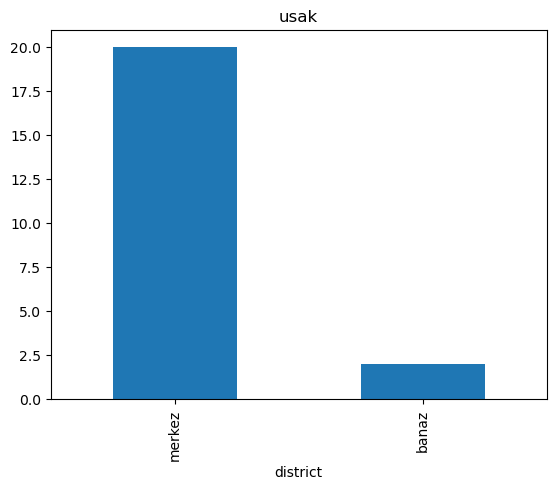

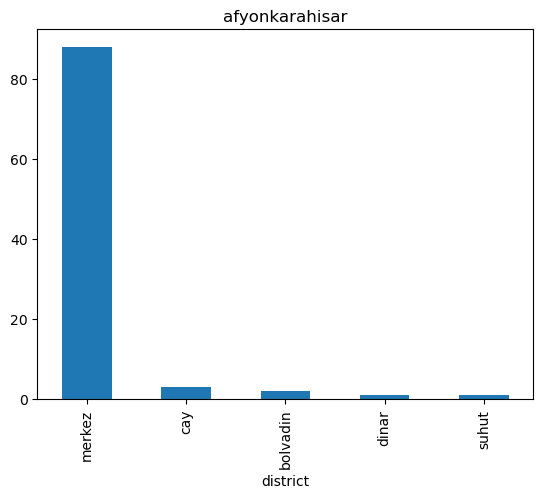

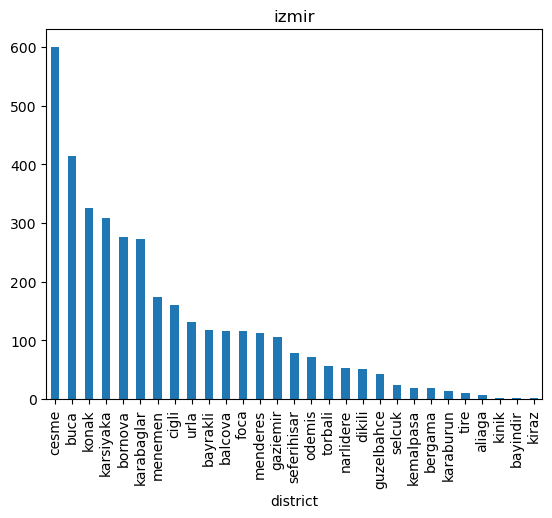

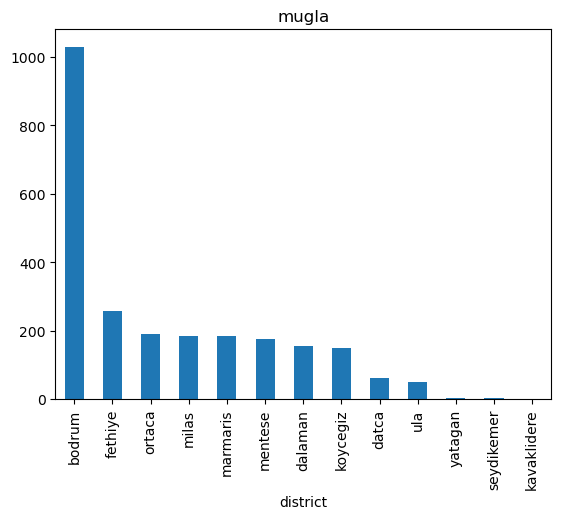

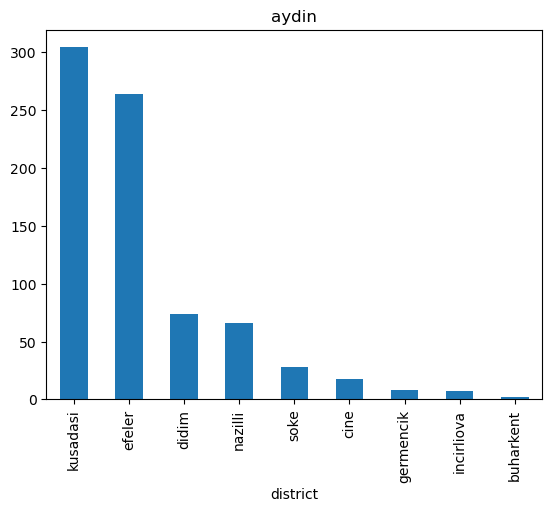

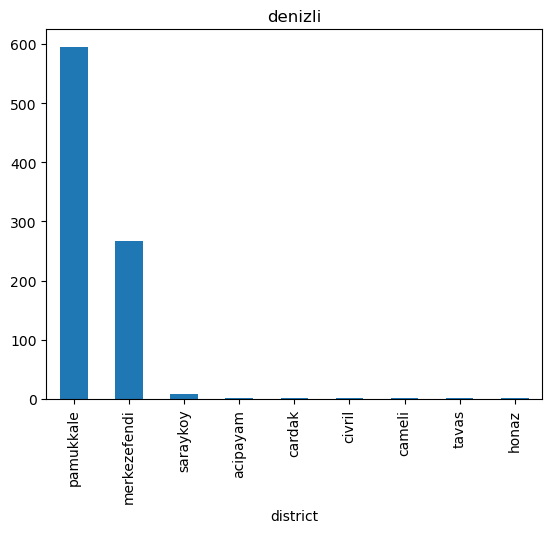

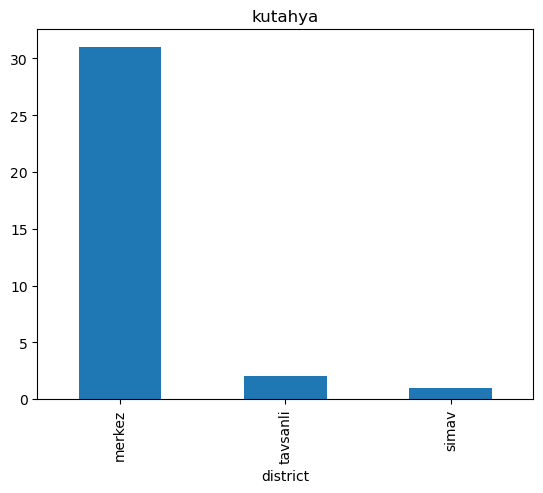

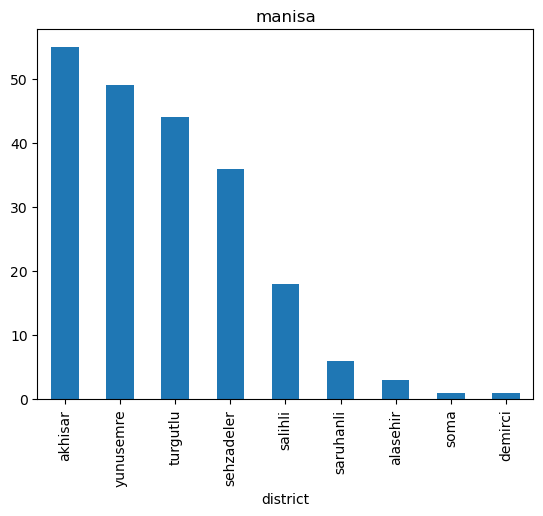

In [66]:
# create histograms for the district column for each city
for city in data["city"].unique():
    data[data["city"] == city]["district"].value_counts().plot(kind="bar", title=city)
    plt.show()

In [67]:
# show the first 5 rows of the data for each column
for column in data.columns:
    print(data[column].head())

0    10.0
1    17.0
2    11.0
3    13.0
4    50.0
Name: photo-count, dtype: float64
0     7.0
1     8.5
2     7.0
3     7.0
4    16.5
Name: list-view-price, dtype: object
0    15-04-2024
1    07-04-2024
2    29-03-2024
3    30-03-2024
4    30-03-2024
Name: list-view-date, dtype: object
0    3 +\n                        1
1    2 +\n                        1
2    1 +\n                        1
3    1 +\n                        1
4    4 +\n                        1
Name: celly, dtype: object
0    150 m²
1    110 m²
2     60 m²
3     50 m²
4    300 m²
Name: celly 2, dtype: object
0    20\n                      Yaşında
1     8\n                      Yaşında
2                           Sıfır Bina
3    10\n                      Yaşında
4    11\n                      Yaşında
Name: celly 3, dtype: object
0     Kot 2
1    1. Kat
2    4. Kat
3    5. Kat
4    7. Kat
Name: celly 4, dtype: object
0    Banazda Şehir Merkezinde Heryere Ulaşimi Çok Y...
1           Kemalöz Semt Pazarı Yanı Kiralık 2+1 

In [68]:
# drop the columns that are not useful
data.drop(['photo-count', 'list-view-date', 'he-lazy-image src', 'left', 'img-wrp href', 'he-lazy-image src 2', 'branded__text', 'branded__text 2', 'img-wrp href 2', 'he-lazy-image src 3'], axis=1, inplace=True)
# see the columns of the data
print(data.columns)

Index(['list-view-price', 'celly', 'celly 2', 'celly 3', 'celly 4',
       'list-view-header', 'list-view-location', 'city', 'district',
       'neighborhood'],
      dtype='object')


In [69]:
# see the unique values of the 'celly' column
print(data["celly"].unique())

['3 +\n                        1' '2 +\n                        1'
 '1 +\n                        1' '4 +\n                        1'
 '2 +\n                        0' 'Stüdyo'
 '3 +\n                        0' '1 +\n                        15'
 '2 +\n                        2' '6 +\n                        2'
 '4 +\n                        2' '3 +\n                        2'
 '9 +\n                        1' '6 +\n                        1'
 '8 +\n                        1' '5 +\n                        1'
 '41 +\n                        4' '4 +\n                        0'
 '5 +\n                        2' '1 +\n                        25'
 '7 +\n                        1' '21 +\n                        1'
 '7 +\n                        2' '6 +\n                        0'
 '9 +\n                        4' '4 +\n                        4'
 '3 +\n                        3' '31 +\n                        1'
 '9 +\n                        3' '25 +\n                        5'
 '8 +\n      

In [70]:
# clean the 'celly' column
data["celly"] = data["celly"].apply(lambda x: x.replace('Stüdyo', '1 + 0'))
data["celly"] = data["celly"].apply(lambda x: x.replace('\n', ''))
data["room"] = data["celly"].apply(lambda x: x.split('+')[0]).astype(int)
data["salon"] = data["celly"].apply(lambda x: x.split('+')[1]).astype(int)
# see the unique values of the 'room' and 'salon' columns
print(data["room"].unique())
print(data["salon"].unique())
# see the frequency of the 'room' and 'salon' columns
print(data["room"].value_counts())
print(data["salon"].value_counts())

[ 3  2  1  4  6  9  8  5 41  7 21 31 25 14 10]
[ 1  0 15  2  4 25  3  5  9  6]
room
3     2825
2     2821
1     1680
4      582
5      154
6       41
7       12
9        9
8        3
21       3
31       2
41       1
25       1
14       1
10       1
Name: count, dtype: int64
salon
1     7815
2      155
0      148
4        7
3        4
5        3
15       1
25       1
9        1
6        1
Name: count, dtype: int64


In [71]:
# drop the 'celly' column
try:
    data.drop("celly", axis=1, inplace=True)
except:
    print("The column has already been dropped.")
# drop the rows that have > 7 rooms and > 2 salons
data = data[(data["room"] <= 7) & (data["salon"] <= 2)]
# see the unique values of the 'room' and 'salon' columns
print(data["room"].unique())
print(data["salon"].unique())

[3 2 1 4 6 5 7]
[1 0 2]


In [72]:
# see the unique values of the 'celly 2' column
print(data["celly 2"].unique())

['150 m²' '110 m²' '60 m²' '50 m²' '300 m²' '117 m²' '70 m²' '140 m²'
 '130 m²' '75 m²' '160 m²' '165 m²' '135 m²' '85 m²' '120 m²' '48 m²'
 '125 m²' '80 m²' '95 m²' '100 m²' '105 m²' '180 m²' '3.200 m²' '90 m²'
 '76 m²' '55 m²' '65 m²' '145 m²' '45 m²' '115 m²' '35 m²' '53 m²'
 '155 m²' '148 m²' '78 m²' '151 m²' '270 m²' '440 m²' '132 m²' '121 m²'
 '141 m²' '170 m²' '122 m²' '200 m²' '87 m²' '146 m²' '220 m²' '108 m²'
 '370 m²' '86 m²' '380 m²' '47 m²' '43 m²' '63 m²' '245 m²' '204 m²'
 '183 m²' '190 m²' '600 m²' '119 m²' '72 m²' '350 m²' '142 m²' '166 m²'
 '870 m²' '330 m²' '96 m²' '41 m²' '143 m²' '280 m²' '64 m²' '57 m²'
 '286 m²' '340 m²' '81 m²' '185 m²' '40 m²' '168 m²' '116 m²' '93 m²'
 '209 m²' '59 m²' '77 m²' '400 m²' '98 m²' '106 m²' '174 m²' '205 m²'
 '74 m²' '500 m²' '68 m²' '275 m²' '52 m²' '137 m²' '167 m²' '217 m²'
 '25 m²' '250 m²' '290 m²' '112 m²' '196 m²' '184 m²' '450 m²' '159 m²'
 '195 m²' '640 m²' '230 m²' '260 m²' '285 m²' '235 m²' '337 m²' '211 m²'
 '240 m²' '1

[ 150  110   60   50  300  117   70  140  130   75  160  165  135   85
  120   48  125   80   95  100  105  180 3200   90   76   55   65  145
   45  115   35   53  155  148   78  151  270  440  132  121  141  170
  122  200   87  146  220  108  370   86  380   47   43   63  245  204
  183  190  600  119   72  350  142  166  870  330   96   41  143  280
   64   57  286  340   81  185   40  168  116   93  209   59   77  400
   98  106  174  205   74  500   68  275   52  137  167  217   25  250
  290  112  196  184  450  159  195  640  230  260  285  235  337  211
  240  134  832 1000   38  147  152   88  213  126  255  199  127   11
  154   22   66  399  187   67  210   89  355   97   84   42   51   73
  325   71 3000  175  320  156  162   18   56  136  131  580  375  161
  163  149  206  138  475  359  124   91  194 4500   20  103   58  302
  505  800  368  178  750   92  181   30  460  390  360  550 4000  295
  128  341  745  118  144   15   82   49  176  182  981  256   62   32
 3510 

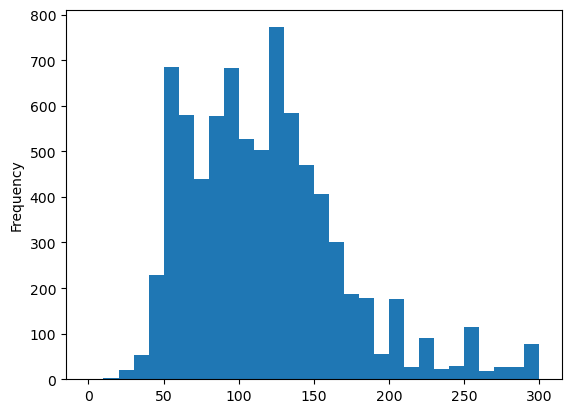

In [73]:
# clean the 'celly 2' column
data["celly 2"] = data["celly 2"].apply(lambda x: x.replace('.', ''))
data["area"] = data["celly 2"].apply(lambda x: x.split(' ')[0]).astype(int)
# see the unique values of the 'area' column
print(data["area"].unique())
# see an histogram of the 'area' column with x axis from 0 to 300
data["area"].plot(kind="hist", bins=30, range=(0, 300))
# drop the 'celly 2' column
try:
    data.drop("celly 2", axis=1, inplace=True)
except:
    print("The column has already been dropped.")

In [74]:
# see the unique values of the 'celly 3' column
print(data["celly 3"].unique())

['20\n                      Yaşında' '8\n                      Yaşında'
 'Sıfır Bina' '10\n                      Yaşında'
 '11\n                      Yaşında' '5\n                      Yaşında'
 '4\n                      Yaşında' '3\n                      Yaşında'
 '15\n                      Yaşında' '1\n                      Yaşında'
 '24\n                      Yaşında' '2\n                      Yaşında'
 '17\n                      Yaşında' '30\n                      Yaşında'
 '28\n                      Yaşında' '25\n                      Yaşında'
 '16\n                      Yaşında' '21\n                      Yaşında'
 '18\n                      Yaşında' '31\n                      Yaşında'
 '22\n                      Yaşında' '7\n                      Yaşında'
 '13\n                      Yaşında' '9\n                      Yaşında'
 '6\n                      Yaşında' '35\n                      Yaşında'
 '39\n                      Yaşında' '14\n                      Yaşında'
 '19\n    

In [75]:
# clean the 'celly 3' column
data["celly 3"] = data["celly 3"].apply(lambda x: x.replace('Sıfır Bina', '0'))
data["celly 3"] = data["celly 3"].apply(lambda x: x.replace('\n', ' '))
data["age"] = data["celly 3"].apply(lambda x: x.split(' ')[0]).astype(int)
# see the unique values of the 'age' column
print(data["age"].unique())
# see the frequency of the 'age' column
print(data["age"].value_counts())
# drop the 'celly 3' column
try:
    data.drop("celly 3", axis=1, inplace=True)
except:
    print("The column has already been dropped.")

[ 20   8   0  10  11   5   4   3  15   1  24   2  17  30  28  25  16  21
  18  31  22   7  13   9   6  35  39  14  19  33  26  12  29  49  27  32
  52  40  38  44  34  23  45  50  42  55  36  43  37  47 300  48 199 100
  60  61 600]
age
5      910
0      843
15     567
10     543
25     464
20     442
4      412
30     372
1      336
11     331
3      303
2      298
16     245
8      210
7      208
21     184
6      176
26     156
12     150
35     139
31     126
18      76
9       72
40      72
13      65
28      62
17      60
14      40
22      33
23      28
27      25
29      21
24      18
19      17
45      15
32      15
50      11
38      10
33       9
37       6
34       6
36       5
55       3
44       3
39       3
42       3
49       2
43       1
52       1
47       1
300      1
48       1
199      1
100      1
60       1
61       1
600      1
Name: count, dtype: int64


In [76]:
# see the unique values of the 'celly 4' column
print(data["celly 4"].unique())

['Kot 2' '1. Kat' '4. Kat' '5. Kat' '7. Kat' '3. Kat' '2. Kat' 'Kot 1'
 'Yüksek Giriş' '9. Kat' 'Ara Kat' 'En Üst Kat' 'Bahçe Katı' 'Yarı Bodrum'
 nan 'Bodrum' 'Kot 3' 'Çatı Katı' 'Zemin' '8. Kat' 'Giriş Katı' '6. Kat'
 '16. Kat' '17. Kat' 'Villa Katı' '10. Kat' '13. Kat' '12. Kat' '11. Kat'
 '14. Kat' '21 ve üzeri' 'Bodrum ve Zemin' 'Asma Kat' '18. Kat' 'Tripleks'
 'Teras Katı' '15. Kat' '20. Kat' '19. Kat']


In [78]:
# clean the 'celly 4' column
search_for = ['nan', 'Kot 3', 'Kot 2', 'Kot 1', 'Yüksek Giriş', 'Ara Kat', 'En Üst Kat', 'Bahçe Katı', 'Yarı Bodrum', 'Bodrum', 'Çatı Katı', 'Zemin', 'Giriş Katı', 'Villa Katı', '21 ve üzeri', 'Bodrum ve Zemin', 'Asma Kat', 'Tripleks', 'Teras Katı']
replace_with = ['2. Kat', '-3. Kat', '-2. Kat', '-1. Kat', '1. Kat', '3. Kat', '5. Kat', '0. Kat', '0. Kat', '0. Kat', '5. Kat', '5. Kat', '1. Kat', '1. Kat', '21. Kat', '0. Kat', '1. Kat', '3. Kat', '5. Kat']
data["celly 4"] = data["celly 4"].replace(search_for, replace_with).astype(str)
# see the unique values of the 'celly 4' column
print(data["celly 4"].unique())
data["floor"] = data["celly 4"].apply(lambda x: x.split('.')[0]).astype(int)
# see the unique values of the 'floor' column
print(data["floor"].unique())
# see the frequency of the 'floor' column
print(data["floor"].value_counts())

['-2. Kat' '1. Kat' '4. Kat' '5. Kat' '7. Kat' '3. Kat' '2. Kat' '-1. Kat'
 '9. Kat' '0. Kat' '-3. Kat' '8. Kat' '6. Kat' '16. Kat' '17. Kat'
 '10. Kat' '13. Kat' '12. Kat' '11. Kat' '14. Kat' '21. Kat' '18. Kat'
 '15. Kat' '20. Kat' '19. Kat']
[-2  1  4  5  7  3  2 -1  9  0 -3  8  6 16 17 10 13 12 11 14 21 18 15 20
 19]
floor
 2     2569
 1     1568
 3     1453
 5      888
 0      795
 4      418
 6      102
 7       80
 8       43
-2       39
-1       39
 11      18
-3       16
 9       14
 10      12
 13      11
 21       9
 12       8
 14       8
 18       4
 16       3
 15       3
 17       2
 20       2
 19       1
Name: count, dtype: int64


In [79]:
# drop the 'celly 4' column
try:
    data.drop("celly 4", axis=1, inplace=True)
except:
    print("The column has already been dropped.")

In [80]:
# see the unique values of the 'list-view-price' column
print(data["list-view-price"].unique())

[7.0 8.5 16.5 20.0 22.0 7.25 15.0 10.0 7.5 6.75 21.0 14.0 8.0 '7.500'
 '8.500' '15.000' '5.000' '7.000' '8.000' '11.000' '9.000' '3.000'
 '10.000' '6.500' '2.500' '6.000' '5.500' '8.750' '4.250' '4.500' '12.500'
 '5.250' '12.000' '7.250' '6.750' '7.750' '3.500' '6.600' '5.100' '13.000'
 '5.600' '1.100.000' '9.500' '4.000' '13.250' '19.000' '29.000' '30.000'
 '25.000' '18.500' '83.000' '14.000' '380.000' '20.000' '210.000'
 '280.000' '325.000' '16.000' '9.250' '37.500' '600.000' '350' '15.500'
 '500.000' '200.000' '20.500' '13.500' '11.500' '17.000' '800.000'
 '10.500' '22.000' '18.000' '50.000' '65.000' '550.000' '45.000' '33.000'
 '100.000' '21.500' '28.500' '26.000' '22.500' '220.000' '400.000'
 '39.000' '27.500' '16.500' '29.500' '15.750' '40.000' '21.750' '35.000'
 '25.500' '21.000' '235.000' '34.000' '96.000' '55.000' '425.000' '24.000'
 '23.000' '19.750' '70.000' '52.500' '32.000' '450.000' '275.000' '19.360'
 '17.500' '19.500' '370.000' '350.000' '9.800' '680.000' '15.590.000'
 

In [83]:
# print the type of the 'list-view-price' column
print(data["list-view-price"].dtype)

object


In [84]:
# clean the 'list-view-price' column
data["list-view-price"] = data["list-view-price"].astype(str).apply(lambda x: x.replace('.', ''))
data["price"] = data["list-view-price"].astype(int)
# see the unique values of the 'price' column
print(data["price"].unique())

[       70        85       165       200       220       725       150
       100        75       675       210       140        80      7500
      8500     15000      5000      7000      8000     11000      9000
      3000     10000      6500      2500      6000      5500      8750
      4250      4500     12500      5250     12000      7250      6750
      7750      3500      6600      5100     13000      5600   1100000
      9500      4000     13250     19000     29000     30000     25000
     18500     83000     14000    380000     20000    210000    280000
    325000     16000      9250     37500    600000       350     15500
    500000    200000     20500     13500     11500     17000    800000
     10500     22000     18000     50000     65000    550000     45000
     33000    100000     21500     28500     26000     22500    220000
    400000     39000     27500     16500     29500     15750     40000
     21750     35000     25500     21000    235000     34000     96000
     5

In [88]:
# drop the 'list-view-price' column
try:
    data.drop("list-view-price", axis=1, inplace=True)
except:
    print("The column has already been dropped.")

In [92]:
# drop the 'list-view-location' column
try:
    data.drop("list-view-location", axis=1, inplace=True)
except:
    print("The column has already been dropped.")

In [93]:
# see the remaining columns
print(data.columns)

Index(['list-view-header', 'city', 'district', 'neighborhood', 'room', 'salon',
       'area', 'age', 'floor', 'price'],
      dtype='object')


In [94]:
# fix the column names
data.columns = ['title', 'city', 'district', 'neighborhood', 'room', 'salon', 'area', 'age', 'floor', 'price']

In [95]:
# see a random sample of the data
print(data.sample(50))

                                                  title     city  \
4146  Selçukbey'de Kiralık 195m2 Ebeveyn Banyolu Bal...  denizli   
962   Foça Bağarasında Anayol Üzeri Kiralık 3+1 Müst...    izmir   
3595  Ada Royalden Yenikent De 1+1 Sürekli Kiralık E...    aydin   
3116  Aydın Germencik Çarşı İçerisinde Doğalgazlı 2+...    aydin   
4154  Rw Safir'den Akkonak Mevkii 1+1 Sıfır Eşyalı K...  denizli   
6974                      Milas Güllük'te Kiralık Daire    mugla   
6444    Dalyan Eskiköyde Eşyalı Tam Müstakil Kiralık Ev    mugla   
2947  İlhan'dan Filiz Caddesi Üzerin De Asansörlü Ki...    izmir   
6304  Turgutreis Merkezde Personele Uygun Eşyalı 2+1...    mugla   
4413       Şemikler Müstakil Tadında Kiralık Bahçe Katı  denizli   
3127  Didim Akbük’te Panoramik Deniz Manzaralı Havuz...    aydin   
4057                          Kervansarayda Kiralık 2+1  denizli   
6576   Bodrum'da Tamamen Eşyalı 1+1 Bahçeli Müstakil Ev    mugla   
3714                1+1 Klimalı Balkonlu  Kiralı

In [96]:
# save the data to a csv file
data.to_csv("hepsiemlak.csv", index=False)